This ipynb aims to find a good model to detect Fraud cases.  
이 ipynb 파일은 부정 거래를 탐지하는 적절한 모형을 찾는 것에 목적을 두고 있습니다.

In [1]:
# Data load 데이터 확인
import pandas as pd

df = pd.read_csv('../data/Fraud_Detection_sql.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TRANS_YEAR             1604294 non-null  int64  
 1   IS_COVID_YEAR          1604294 non-null  int64  
 2   TRANS_MONTH            1604294 non-null  int64  
 3   TRANS_DAY              1604294 non-null  int64  
 4   TRANS_DAY_SIMPLIFIED   1604294 non-null  int64  
 5   TRANS_HOUR             1604294 non-null  int64  
 6   TRANS_HOUR_SIMPLIFIED  1604294 non-null  int64  
 7   CATEGORY               1604294 non-null  int64  
 8   AMT                    1604294 non-null  float64
 9   GENDER                 1604294 non-null  int64  
 10  CITY                   1604294 non-null  object 
 11  CITY_POP               1604294 non-null  int64  
 12  STATE                  1604294 non-null  int64  
 13  JOB                    1604294 non-null  object 
 14  AGE               

In [2]:
# ready for get_dummies() 카테고리 변수 변환을 위한 작업
df['TRANS_MONTH'] = df['TRANS_MONTH'].astype(str)
df['TRANS_DAY_SIMPLIFIED'] = df['TRANS_DAY_SIMPLIFIED'].astype(str)
df['TRANS_HOUR_SIMPLIFIED'] = df['TRANS_HOUR_SIMPLIFIED'].astype(str)
df['CATEGORY'] = df['CATEGORY'].astype(str)
df['STATE'] = df['STATE'].astype(str)

# remove unnecessary columns for regression 불필요한 컬럼 제거
df = df.drop(columns='TRANS_YEAR')  
df = df.drop(columns='TRANS_DAY')
df = df.drop(columns='TRANS_HOUR')
df = df.drop(columns='CC_NUM')
df = df.drop(columns='AMT')

# those three requires too many columns for model  이 3개의 변수는 모형에 지나치게 많은 컬럼을 생성한다.
df = df.drop(columns='CITY')
df = df.drop(columns='JOB')
df = df.drop(columns='STATE')

# Unlike the AI model, the ML model uses those two columns below 
# 인공지능 모형과 달리 머신러닝 모형은 아래 두 컬럼을 사용한다.
# df = df.drop(columns='CITY_POP')
# df = df.drop(columns='CATEGORY')


# check 결과 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   IS_COVID_YEAR          1604294 non-null  int64  
 1   TRANS_MONTH            1604294 non-null  object 
 2   TRANS_DAY_SIMPLIFIED   1604294 non-null  object 
 3   TRANS_HOUR_SIMPLIFIED  1604294 non-null  object 
 4   CATEGORY               1604294 non-null  object 
 5   GENDER                 1604294 non-null  int64  
 6   CITY_POP               1604294 non-null  int64  
 7   AGE                    1604294 non-null  int64  
 8   IS_FRAUD               1604294 non-null  int64  
 9   log_AMT                1604294 non-null  float64
 10  BC_CITY_POP            1604294 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 134.6+ MB


Those columns are based on the previous process.  
기존의 전처리 과정을 반영하여 필요한 컬럼들만 남겨두었다.   
  
    

  
    
## Logistic regression and Lasso (Failed)  
## 로지스틱 회귀, 라쏘회귀 시도(실패)
Following codes below are the failed trial to detect Fraud via Logistic regression or Lasso  
아래의 코드는 로지스틱 회귀, 라쏘회귀를 통한 부정거래 감지 모형을 설계하는데 실패한 코드이다.

In [ ]:
# # Data encoding through get_dummies()
# reg_df = pd.get_dummies(df)

In [ ]:
# x = df.values
# y = df['IS_FRAUD'].values

# # check the shape
# print("x.shape : {0}, y.shape : {1}".format(x.shape, y.shape))

In [ ]:
# # Data split for regression
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=True, stratify=y, random_state=1)

In [ ]:
# # Oversampling 'IS_FRAUD' through SMOTE
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority', random_state = 10)
# x_train_over, y_train_over = smote.fit_resample(x, y)

In [ ]:
# # Note that this requires 32GB memory
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(solver='lbfgs', max_iter=5000).fit(x_train_over, y_train_over)
# print("테스트 점수 : {:.2f}".format(logreg.score(x_test,y_test)))

# # 지나치게 많은 features(586개)로 overfitting 문제 발생

In [ ]:
# print("x.shape : {0}, y.shape : {1}".format(x_train_over, y_train_over))
# x_train_over.info()

In [ ]:
# from sklearn.linear_model import Lasso  # Lasso 규제 test (default는 여전히 과적합 발생)

# lasso = Lasso().fit(x_train_over, y_train_over)
# print(lasso.score(x_train_over, y_train_over))
# print(lasso.score(x_test,y_test))

In [ ]:
# train_score = []
# test_score = []

# alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
# for alpha in alpha_list:
#     lasso = Lasso(alpha=alpha, max_iter=5000) # max_iter: 지정 반복횟수 설정. 기본값은 1000
#     lasso.fit(x_train_over, y_train_over)      # 이 반복횟수가 부족하면 convergence warning 뜸.
#     train_score.append(lasso.score(x_train_over, y_train_over))  # 근데 떠도 여기서 큰 문제 없음
#     test_score.append(lasso.score(x_test,y_test))    

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# plt.plot(np.log10(alpha_list), train_score)
# plt.plot(np.log10(alpha_list), test_score)
# plt.legend(['Train score', 'Test score'], loc = 'best')
# plt.show()

Those models resulted in negative scores, which means the model is not appropriate enought to detect Fraud.  
이 모형들은 점수가 음수로 나왔다. 즉, 이 모형들로 부정거래를 탐지하기엔 적절하지 않다.


## Light GBM
- LightGBM is one of 'HOT' model in ML, not to meantion gbdt(tree model based) is stable regardless of outliers.
- LightGBM 모형은 핫한 머신러닝 모형 중 하나이다. 실질적으로는 이상치 영향을 안받는 트리기반 모형이기에 선정하였다.


If it is your first time to use SMOTE, type __'conda install -c conda-forge imbalanced-learn'__ at anaconda prompt first.  
만약 SMOTE를 처음 실행시키는 환경이라면 아래 imblearn을 설치해야 정상 작동한다.  

In [ ]:
# #install imblearn if you use SMOTE for the first time
# !pip install imblearn 

In [3]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Data encoding through get_dummies() 범주형 변수를 원-핫 인코딩
df_encoded = pd.get_dummies(df)


x = df_encoded.drop('IS_FRAUD', axis=1)
y = df['IS_FRAUD']


# Data split 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)


# SMOTE for train sets only 학습 데이터에만 적용
smote = SMOTE(sampling_strategy={1: 800000}, random_state=10)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

C:\Users\Seward_Shin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Seward_Shin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Since total numeber is 1.6M, fraud case around 9000 data needs to be oversampled to its half, 0.8M.  
전체 데이터가 160만개이므로 부정거래 케이스를 담은 약 9000개의 데이터를 이것의 절반인 약 80만으로 확장한다.

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define data set with auto-detect categorical features  데이터셋 생성 및 카테고리형 변수 자동 감지
train_data = lgb.Dataset(x_train_over, label=y_train_over, categorical_feature='auto')

# LightGBM 
# Those parameters were from several trials and errors. 이 모형의 파라미터는 수동으로 시행착오를 겪으며 설정되었다.
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 100,
    'min_child_samples': 40,  # min_data_in_leaf 
    'reg_alpha': 2,  # lambda_l1 
    'reg_lambda': 4,  # lambda_l2 
    'colsample_bytree': 0.8,  # feature_fraction 
    'learning_rate': 0.5,
    'verbose':0
    
}
# Note that train_data is only chosen!  훈련 데이터만 선택됨에 유의한다!
model = lgb.train(params, train_data, num_boost_round=300)

# Prediction for test data  테스트 데이터에 대한 예측
y_pred = model.predict(x_test)

# Transform the prediction into binary numbers  예측값을 이진 분류로 변환
y_pred_binary = [1 if pred >= 0.326 else 0 for pred in y_pred]

# "Confusion Matrix 혼동행렬
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix(혼동행렬):")
print(conf_matrix)

# Model Evaluation 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Despite 99 accuracy in the test set, the real point is the f1-score considering both precision and recall. This model can __detect fraud with 87%__ probability.  
test set에 나오는 점수는 99점으로 준수해보이지만 본질적인 것은 1을 만났을 때 제대로 감지하는 지 여부다. 이 모형은 __87%확률로 부정거래를 감지__ 한다.

Precision_recall_curve shows which threshold is accurate for binary number transformation. 0.326 is the best status in this case.  
아래 코드는 예측값 이진분류 변환 기준을 무엇으로 두어야할지 알려주는 근거이다. 결과적으로 0.326이 가장 적절하였다.

In [5]:
from sklearn.metrics import precision_recall_curve

# 모델의 예측 확률
y_probs = model.predict(x_test, num_iteration=model.best_iteration)

# Precision-Recall 곡선 생성
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Precision과 Recall을 출력
for p, r, t in zip(precision, recall, thresholds):
    print(f"Threshold: {t:.3f}, Precision: {p:.3f}, Recall: {r:.3f}")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999
Threshold: 0.000, Precision: 0.067, Recall: 0.999


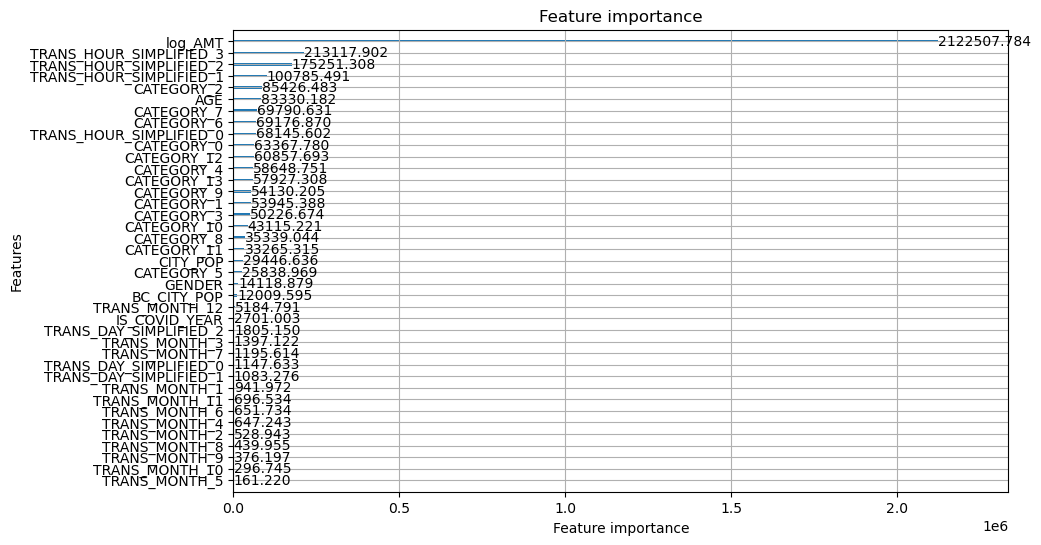

In [12]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Feature importance  모델 변수 중요도 시각화
lgb.plot_importance(model, importance_type='gain', figsize=(10, 6))
plt.show()

Feature importance shows AMT, hour(3), category(2), AGE, day(2), month(12) has comparatively strong tendencies.  
이 그래프 결과는 금액 양, 시간(3), 카테고리(2), 나이, 날(2), 12월에 경향성이 높음을 보여준다.  